In [1]:
import librosa
import librosa.display 
import matplotlib.pyplot as plt



Text(0, 0.5, 'Amplitude')

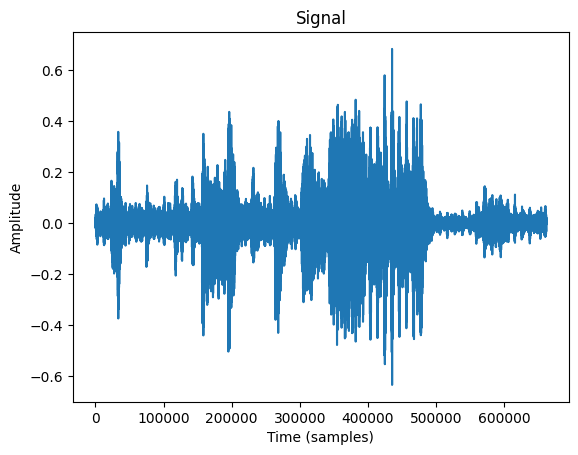

In [2]:
file = "/home/xvan/dataset/sound/GTZAN/Data/genres_original/jazz/jazz.00000.wav"
y, sr = librosa.load(file)
plt.plot(y)
plt.title('Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

In [ ]:
import numpy as np 
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))

plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

In [ ]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
window_length = 1024
hop_length = window_length // 2
data = librosa.feature.melspectrogram(y=y, sr=11025, n_fft=window_length, hop_length=hop_length,
                                        power=1, n_mels=40, fmin=20, fmax=5000)
data = librosa.amplitude_to_db(data, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

In [16]:
def extract_key_features(file, window_length=8192):
    y, sr = librosa.load(file, sr=22050)
    hop_length = window_length // 2
    octaves = 8
    bins_per_semitone = 2
    bins_per_octave = 12 * bins_per_semitone
    data = np.abs(librosa.cqt(y, sr=sr, hop_length=hop_length,
                              fmin=librosa.note_to_hz('C1'),
                              n_bins=bins_per_octave * octaves,
                              bins_per_octave=bins_per_octave))
    return data

(192, 162)


Text(0.5, 1.0, 'Result')

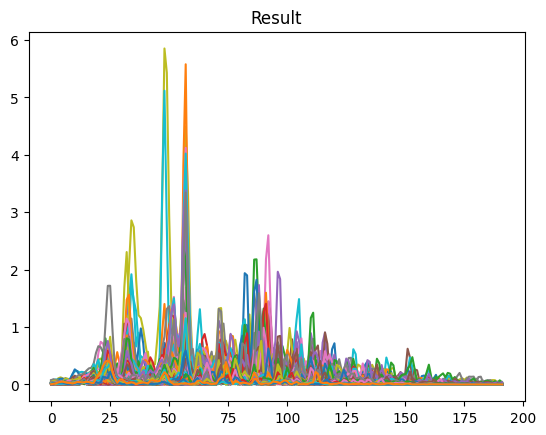

In [23]:
data = extract_key_features(file)
print(data.shape)
plt.plot(data)
plt.title('Result')
